In [ ]:
!pip install pykalman

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=4201bd9bbb08ff094b38a15b191e2e77fcb0d67621b6d7ebce896ba1b206bd19
  Stored in directory: /root/.cache/pip/wheels/7a/68/21/675239322d2bb2e8e1fa317d4bd7b5566a4e82780b25a27f7a
Successfully built pykalman


In [ ]:
import yfinance as yf
data = yf.download("AAPL", start="2017-01-01", end="2023-4-12")
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900
2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200


In [ ]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(data['Close'].values)

# Call it KF_mean
data['KF_mean'] = np.array(state_means)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300,158.526349
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700,159.024199
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100,159.560305
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900,159.795234
2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200,159.890813


Text(0, 0.5, 'Price')

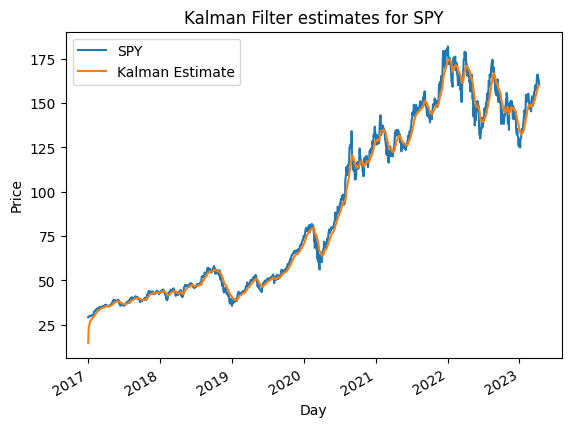

In [ ]:
data[['Close','KF_mean']].plot()
plt.title('Kalman Filter estimates for SPY')
plt.legend(['SPY','Kalman Estimate'])
plt.xlabel('Day')
plt.ylabel('Price')